# Natural Language Understanding [CSL7640]
## Assignment - 1

Submitted by
Debonil Ghosh (M21AIE225)
Ravi Shankar Kumar (M21AIE247)
Saurav Chowdhury (M21AIE256)

Executive MTech
Artificial Intelligence
Indian Institute of Technology, Jodhpur


M21AIE225_M21AIE247_M21AIE256_NLU_A1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('downloads/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [4]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [6]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


In [7]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
print(accuracy*100)

86.16


In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)

In [10]:
print(accuracy_tfidf*100)

86.91


3. ii ) Model a decision tree with TF-IDF features

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)

In [12]:
print(accuracy_dec*100)

71.48


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [13]:
# helps in model building
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [14]:
# helps in text preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [15]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

[[1148, 3671, 9852, 849, 1119, 376, 21997, 51, 34614, 1639, 58, 93, 89, 1417, 3587, 536, 1739, 2053, 23070, 1246, 68414, 17410, 1701, 90, 13784, 2988, 1, 21, 42, 63, 4406, 4239, 136, 5, 10514, 52, 86, 70, 21998, 1601, 51, 86, 6, 2, 521, 700, 81, 415, 2325, 921, 3, 158, 921, 104, 511, 13, 13, 45], [14, 255, 4966, 3760, 10326, 345, 42, 99, 1588, 14928, 2471, 40, 496, 38398, 126, 6151, 2374, 162, 155, 1155, 3207, 124, 395, 78, 337, 13161, 5, 39, 1848, 3461, 43767, 22, 1853, 9252, 1, 124, 61, 42, 128, 817, 2149, 187, 719, 468, 151, 145, 44, 419, 54, 817, 416, 42, 735, 7, 3497, 5, 369, 596, 21022, 1015, 51982, 1, 42, 183, 821, 2919, 14, 5, 249, 68415, 1002, 8612, 6208, 54, 817, 2567, 5, 1890, 50, 7968, 250, 4101, 2316, 54, 685, 335, 12584, 1, 1716, 99, 1525, 1616, 409, 70, 118, 108, 1442, 266, 187, 12306, 6387, 77, 127, 8494, 2283, 298, 2132, 12306, 37, 1566, 5268, 43768, 304, 68416, 4223, 817, 1008, 1222, 1027, 97, 15, 1483, 56, 94, 176, 409, 1303, 42, 12584, 1, 11, 441, 354, 47, 5311, 104

In [31]:
max_length = 128
word_embed_dim = 100
vocab_size = len(t.word_index) + 1
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[1148 3671 9852 ...    0    0    0]
 [   5  369  596 ...   42   54  809]
 [  20  882    2 ...    0    0    0]
 ...
 [ 259 1794   39 ...    0    0    0]
 [   6   84   27 ...    0    0    0]
 [ 110 1339 5355 ...    0    0    0]]


In [32]:

# define the model
RNNModel64 = Sequential(name="SimpleRNNModel64")
RNNModel64.add(Embedding(vocab_size, word_embed_dim, input_length=max_length))
RNNModel64.add(SimpleRNN(64,dropout=0.2, return_sequences=False))
RNNModel64.add(Dense(64, activation='relu'))
RNNModel64.add(keras.layers.Dropout(0.2))
RNNModel64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(1e-5)

# compile the model
RNNModel64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel64.summary())

Model: "SimpleRNNModel64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,921,085
Trainable params: 13,921,085
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
def plot_training_graph(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/100
1125/1125 [==============================] - 241s 212ms/step - loss: 0.9344 - accuracy: 0.5068 - val_loss: 0.7036 - val_accuracy: 0.5058
Epoch 2/100
1125/1125 [==============================] - 179s 159ms/step - loss: 0.7420 - accuracy: 0.5109 - val_loss: 0.6943 - val_accuracy: 0.5297
Epoch 3/100
1125/1125 [==============================] - 176s 156ms/step - loss: 0.7054 - accuracy: 0.5495 - val_loss: 0.6464 - val_accuracy: 0.6415
Epoch 4/100
1125/1125 [==============================] - 174s 155ms/step - loss: 0.6227 - accuracy: 0.6716 - val_loss: 0.5554 - val_accuracy: 0.7390
Epoch 5/100
1125/1125 [==============================] - 175s 155ms/step - loss: 0.6020 - accuracy: 0.7379 - val_loss: 0.5324 - val_accuracy: 0.7490
Epoch 6/100
1125/1125 [==============================] - 182s 162ms/step - loss: 0.4959 - accuracy: 0.7861 - val_loss: 0.4923 - val_accuracy: 0.7983
Epoch 7/100
1125/1125 [==============================] - 205s 182ms/step - loss: 0.4478 - accuracy: 0.8247

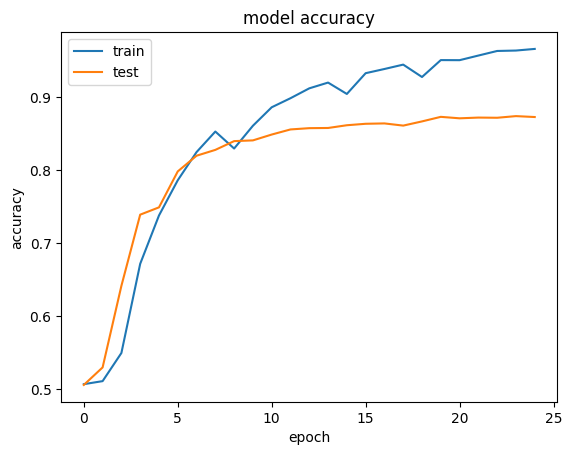

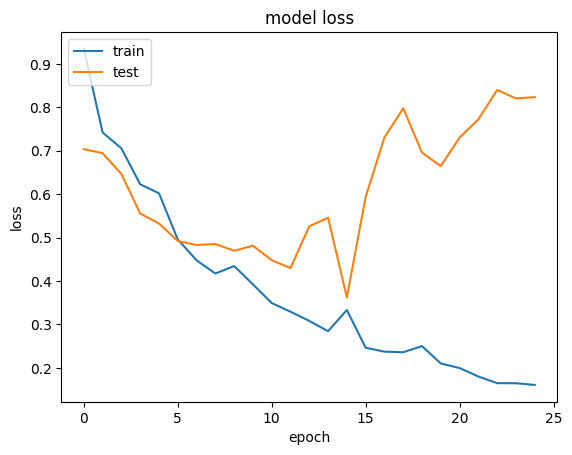

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = RNNModel64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [36]:
preds_rnn_64 = (RNNModel64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 2s 6ms/step


In [37]:
c_report(y_test, preds_rnn_64)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      5044
           1       0.85      0.90      0.88      4956

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 0.8752


0.8752

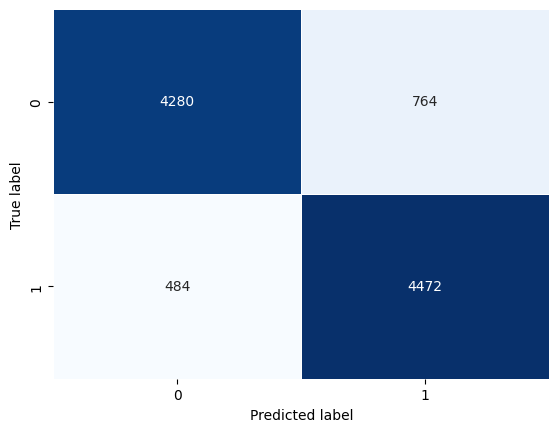

In [38]:
plot_confusion_matrix(y_test, preds_rnn_64)

4. Developing Deep neural networks:

    a. RNN model.
    
      2. 256 hidden-vector dimension.


In [39]:
# define the model
RNNModel256 = Sequential(name="SimpleRNNModel256")
RNNModel256.add(Embedding(vocab_size, word_embed_dim, input_length=max_length))
RNNModel256.add(SimpleRNN(256,dropout=0.2, return_sequences=False))
RNNModel256.add(Dense(64, activation='relu'))
RNNModel256.add(keras.layers.Dropout(0.2))
RNNModel256.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
RNNModel256.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(RNNModel256.summary())

Model: "SimpleRNNModel256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 256)               91392     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,014,205
Trainable params: 14,014,205
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 229s 202ms/step - loss: 1.2344 - accuracy: 0.5056 - val_loss: 0.6969 - val_accuracy: 0.5178
Epoch 2/100
1125/1125 [==============================] - 249s 221ms/step - loss: 0.7449 - accuracy: 0.5074 - val_loss: 0.6938 - val_accuracy: 0.5275
Epoch 3/100
1125/1125 [==============================] - 241s 214ms/step - loss: 0.7106 - accuracy: 0.5344 - val_loss: 0.6888 - val_accuracy: 0.5608
Epoch 4/100
1125/1125 [==============================] - 248s 220ms/step - loss: 0.6598 - accuracy: 0.6182 - val_loss: 0.6838 - val_accuracy: 0.5495
Epoch 5/100
1125/1125 [==============================] - 254s 225ms/step - loss: 0.6220 - accuracy: 0.6584 - val_loss: 0.5799 - val_accuracy: 0.6998
Epoch 6/100
1125/1125 [==============================] - 225s 200ms/step - loss: 0.6338 - accuracy: 0.6496 - val_loss: 0.5899 - val_accuracy: 0.6938
Epoch 7/100
1125/1125 [==============================] - 232s 207ms/step - loss: 0.5112 - accuracy: 0.7710

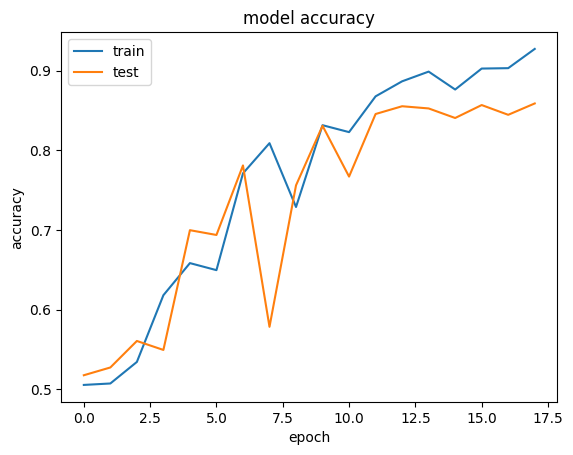

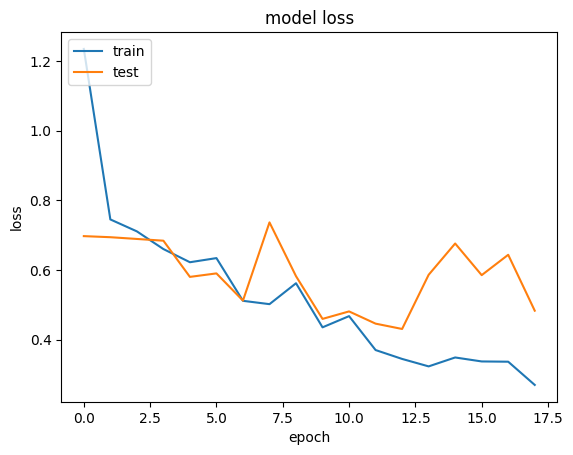

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# fit the model
history = RNNModel256.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [41]:
preds_rnn_256 = (RNNModel256.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 9s 26ms/step


In [42]:
c_report(y_test, preds_rnn_256)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5044
           1       0.84      0.91      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy : 0.8687


0.8687

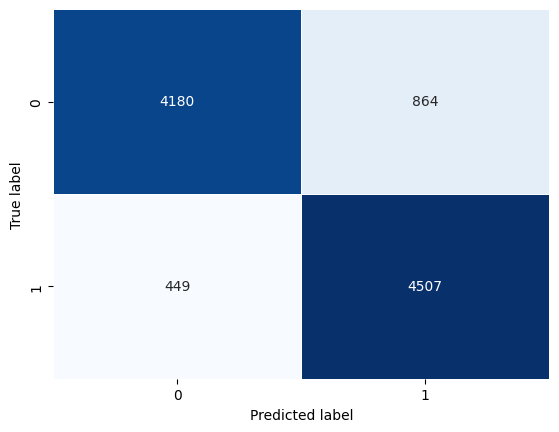

In [43]:
plot_confusion_matrix(y_test, preds_rnn_256)

4. Developing Deep neural networks:

    b. 1-layer LSTM model


In [44]:
# define the model
SingleLSTMLayer64 = Sequential(name="SingleLSTMLayer64")
SingleLSTMLayer64.add(Embedding(vocab_size, word_embed_dim, input_length=max_length))
SingleLSTMLayer64.add(LSTM(64,dropout=0.2, return_sequences=False))
SingleLSTMLayer64.add(Dense(64, activation='relu'))
SingleLSTMLayer64.add(keras.layers.Dropout(0.1))
SingleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleLSTMLayer64.summary())

Model: "SingleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13,952,765
Trainable params: 13,952,765
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
1125/1125 [==============================] - 206s 181ms/step - loss: 2.2003 - accuracy: 0.4984 - val_loss: 1.5237 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 206s 183ms/step - loss: 1.3772 - accuracy: 0.4984 - val_loss: 1.1684 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 201s 179ms/step - loss: 1.0166 - accuracy: 0.4979 - val_loss: 0.8275 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 191s 170ms/step - loss: 0.8116 - accuracy: 0.5030 - val_loss: 0.7642 - val_accuracy: 0.5027
Epoch 5/100
1125/1125 [==============================] - 188s 167ms/step - loss: 0.7503 - accuracy: 0.5025 - val_loss: 0.7128 - val_accuracy: 0.5063
Epoch 6/100
1125/1125 [==============================] - 187s 167ms/step - loss: 0.6945 - accuracy: 0.5276 - val_loss: 0.6744 - val_accuracy: 0.6000
Epoch 7/100
1125/1125 [==============================] - 180s 160ms/step - loss: 0.6277 - accuracy: 0.6511

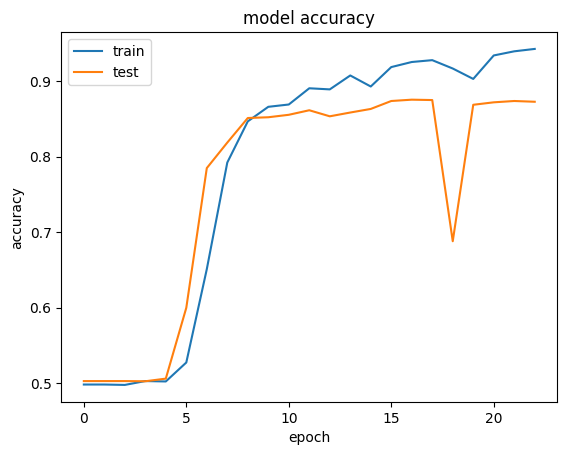

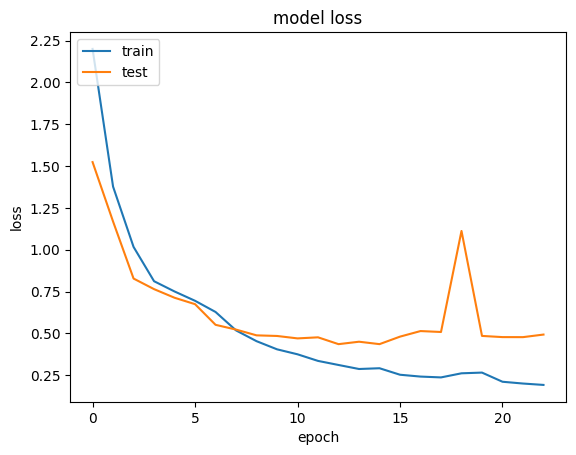

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = SingleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [46]:
preds_1_lstm_64 = (SingleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 6s 15ms/step


In [47]:
c_report(y_test, preds_1_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5044
           1       0.88      0.86      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy : 0.8746


0.8746

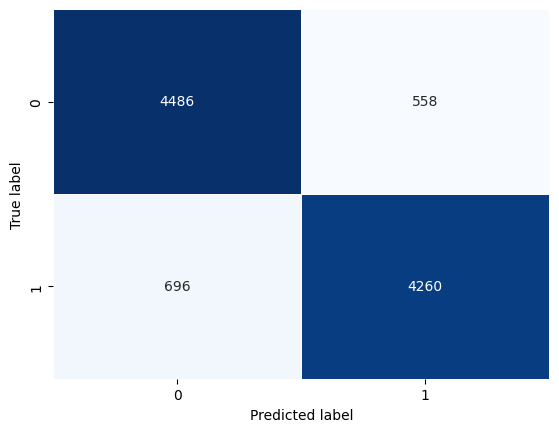

In [48]:
plot_confusion_matrix(y_test, preds_1_lstm_64)

4. Developing Deep neural networks:

    c. 2-layer LSTM model


In [49]:
# define the model
DoubleLSTMLayer64 = Sequential(name="DoubleLSTMLayer64")
DoubleLSTMLayer64.add(Embedding(vocab_size, word_embed_dim, input_length=max_length))
DoubleLSTMLayer64.add(LSTM(64,dropout=0.2, return_sequences=True))
DoubleLSTMLayer64.add(LSTM(32,dropout=0.2, return_sequences=False))
DoubleLSTMLayer64.add(Dense(32, activation='relu'))
DoubleLSTMLayer64.add(keras.layers.Dropout(0.1))
DoubleLSTMLayer64.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
DoubleLSTMLayer64.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(DoubleLSTMLayer64.summary())

Model: "DoubleLSTMLayer64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 lstm_2 (LSTM)               (None, 128, 64)           42240     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,962,045
Trainable params: 13,962

Epoch 1/100
1125/1125 [==============================] - 210s 184ms/step - loss: 2.3612 - accuracy: 0.4984 - val_loss: 1.7587 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 203s 181ms/step - loss: 1.6383 - accuracy: 0.4984 - val_loss: 1.4359 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 218s 194ms/step - loss: 1.3152 - accuracy: 0.4984 - val_loss: 1.1126 - val_accuracy: 0.5030
Epoch 4/100
1125/1125 [==============================] - 269s 239ms/step - loss: 1.0102 - accuracy: 0.4975 - val_loss: 0.8890 - val_accuracy: 0.5125
Epoch 5/100
1125/1125 [==============================] - 263s 234ms/step - loss: 0.8858 - accuracy: 0.5038 - val_loss: 0.8260 - val_accuracy: 0.5033
Epoch 6/100
1125/1125 [==============================] - 239s 212ms/step - loss: 0.8157 - accuracy: 0.5001 - val_loss: 0.7592 - val_accuracy: 0.5038
Epoch 7/100
1125/1125 [==============================] - 231s 205ms/step - loss: 0.7372 - accuracy: 0.5067

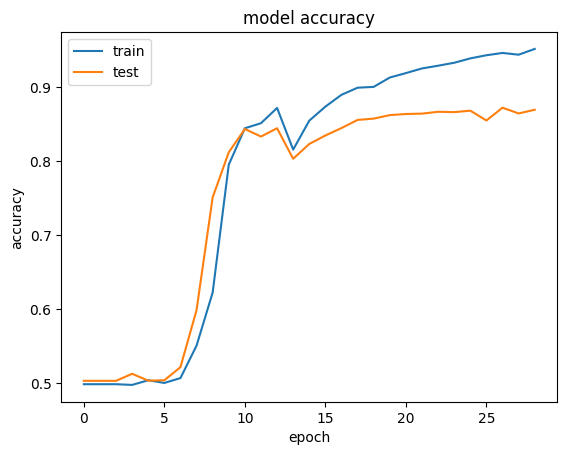

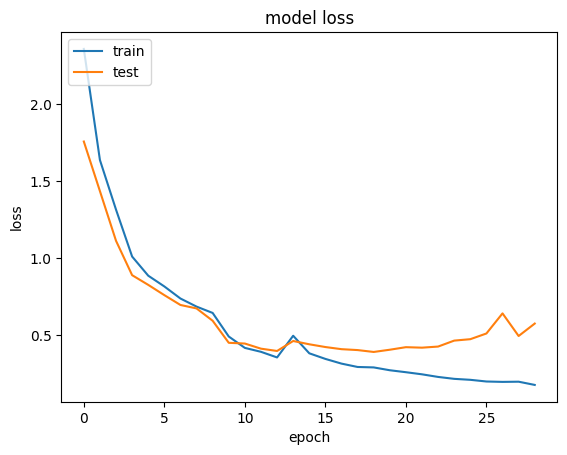

In [50]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = DoubleLSTMLayer64.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [51]:
preds_2_lstm_64 = (DoubleLSTMLayer64.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 9s 25ms/step


In [52]:
c_report(y_test, preds_2_lstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5044
           1       0.88      0.88      0.88      4956

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 0.8769


0.8769

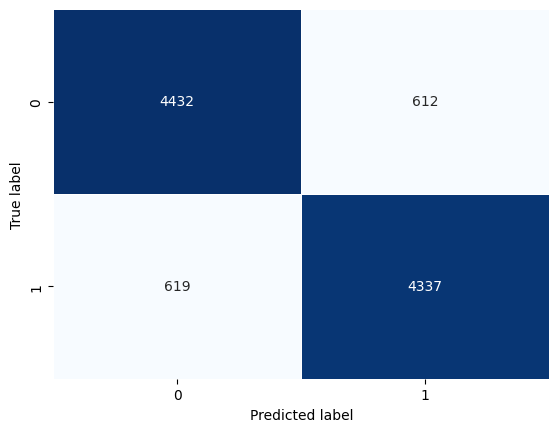

In [53]:
plot_confusion_matrix(y_test, preds_2_lstm_64)

4. Developing Deep neural networks:

    d. 1-layer Bi-LSTM model


In [54]:
# define the model
SingleBiLSTMModel = Sequential(name="SingleBiLSTMModel")
SingleBiLSTMModel.add(Embedding(vocab_size, word_embed_dim, input_length=max_length))
SingleBiLSTMModel.add(Bidirectional(LSTM(64,dropout=0.2, return_sequences=False)))
SingleBiLSTMModel.add(Dense(32, activation='relu'))
SingleBiLSTMModel.add(keras.layers.Dropout(0.1))
SingleBiLSTMModel.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
SingleBiLSTMModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(SingleBiLSTMModel.summary())

Model: "SingleBiLSTMModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,994,941
Trainable params: 13,994,941
Non-trainable params: 0
_____________________________________

Epoch 1/100
1125/1125 [==============================] - 211s 182ms/step - loss: 1.9531 - accuracy: 0.4984 - val_loss: 1.3335 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 205s 182ms/step - loss: 1.1864 - accuracy: 0.4984 - val_loss: 0.9883 - val_accuracy: 0.5030
Epoch 3/100
1125/1125 [==============================] - 205s 182ms/step - loss: 0.8671 - accuracy: 0.5001 - val_loss: 0.7683 - val_accuracy: 0.5105
Epoch 4/100
1125/1125 [==============================] - 206s 183ms/step - loss: 0.7558 - accuracy: 0.5063 - val_loss: 0.7126 - val_accuracy: 0.5115
Epoch 5/100
1125/1125 [==============================] - 205s 183ms/step - loss: 0.6942 - accuracy: 0.5388 - val_loss: 0.6645 - val_accuracy: 0.6350
Epoch 6/100
1125/1125 [==============================] - 206s 183ms/step - loss: 0.6077 - accuracy: 0.6883 - val_loss: 0.5603 - val_accuracy: 0.7410
Epoch 7/100
1125/1125 [==============================] - 205s 183ms/step - loss: 0.4950 - accuracy: 0.8042

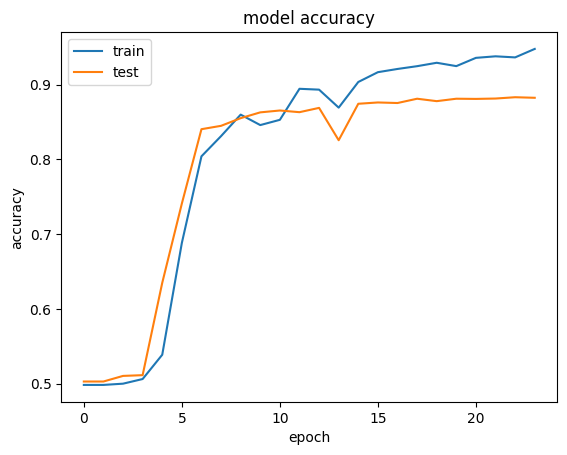

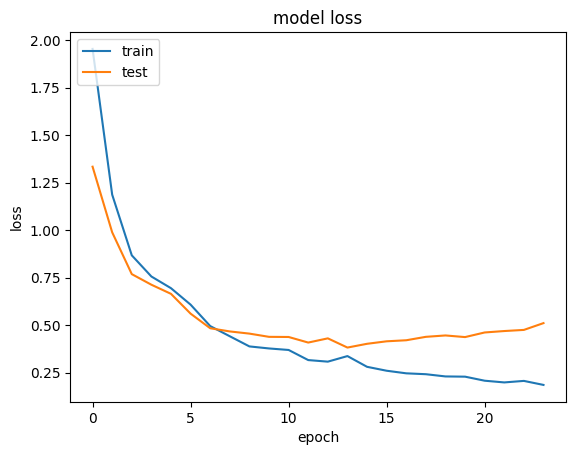

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = SingleBiLSTMModel.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [56]:
preds_bilstm_64 = (SingleBiLSTMModel.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 7s 19ms/step


In [57]:
c_report(y_test, preds_bilstm_64)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5044
           1       0.89      0.87      0.88      4956

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 0.882


0.882

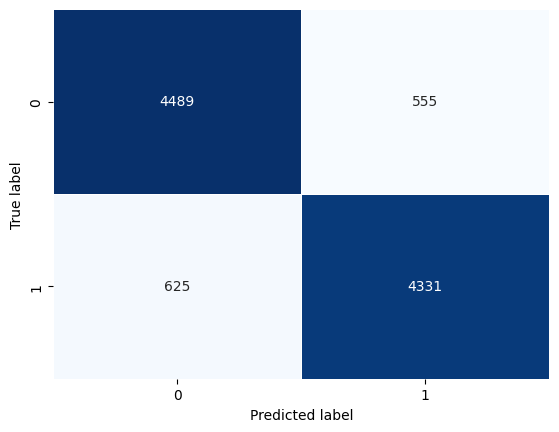

In [58]:
plot_confusion_matrix(y_test, preds_bilstm_64)

4. Developing Deep neural networks:

    e. Use Google word2vec embeddings as input embedding to model in 4.d. [Compare the performance 4.e vs 4.d]


In [59]:
from gensim.models import Word2Vec

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=word_embed_dim,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 38416


In [60]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, word_embed_dim))

for word, token in t.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (139063, 100)


In [61]:
#max_length = 64

# define the model
BiLSTMLayerWithWord2Vec = Sequential(name="BiLSTMLayerWithWord2Vec")
BiLSTMLayerWithWord2Vec.add(Embedding(vocab_size, word_embed_dim, input_length=max_length,
                                      weights=[embedding_matrix],trainable = False))
#BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))
BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(64, dropout=0.2, return_sequences=False)))
BiLSTMLayerWithWord2Vec.add(Dense(32, activation='relu'))
BiLSTMLayerWithWord2Vec.add(Dropout(0.1))
BiLSTMLayerWithWord2Vec.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
BiLSTMLayerWithWord2Vec.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(BiLSTMLayerWithWord2Vec.summary())

Model: "BiLSTMLayerWithWord2Vec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 128, 100)          13906300  
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,994,941
Trainable params: 88,641
Non-trainable params: 13,906,300
__________________________

Epoch 1/100
1125/1125 [==============================] - 60s 54ms/step - loss: 0.5348 - accuracy: 0.7515 - val_loss: 0.4793 - val_accuracy: 0.7883
Epoch 2/100
1125/1125 [==============================] - 68s 60ms/step - loss: 0.5302 - accuracy: 0.7554 - val_loss: 0.4804 - val_accuracy: 0.7872
Epoch 3/100
1125/1125 [==============================] - 72s 64ms/step - loss: 0.5257 - accuracy: 0.7576 - val_loss: 0.4774 - val_accuracy: 0.7910
Epoch 4/100
1125/1125 [==============================] - 69s 61ms/step - loss: 0.5206 - accuracy: 0.7614 - val_loss: 0.4683 - val_accuracy: 0.7987
Epoch 5/100
1125/1125 [==============================] - 72s 64ms/step - loss: 0.5155 - accuracy: 0.7642 - val_loss: 0.4723 - val_accuracy: 0.8012
Epoch 6/100
1125/1125 [==============================] - 71s 63ms/step - loss: 0.5141 - accuracy: 0.7708 - val_loss: 0.4735 - val_accuracy: 0.8077
Epoch 7/100
1125/1125 [==============================] - 73s 65ms/step - loss: 0.5102 - accuracy: 0.7805 - val_loss: 0

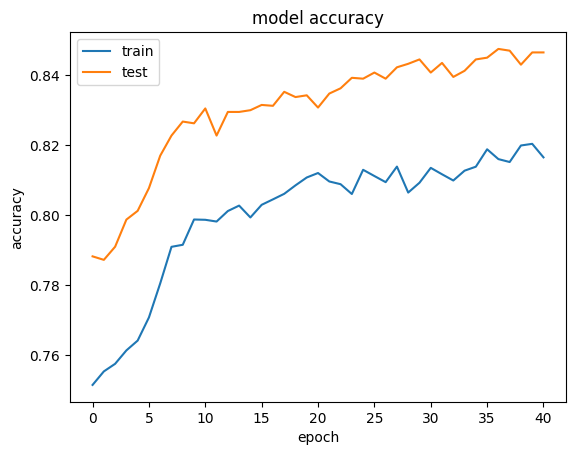

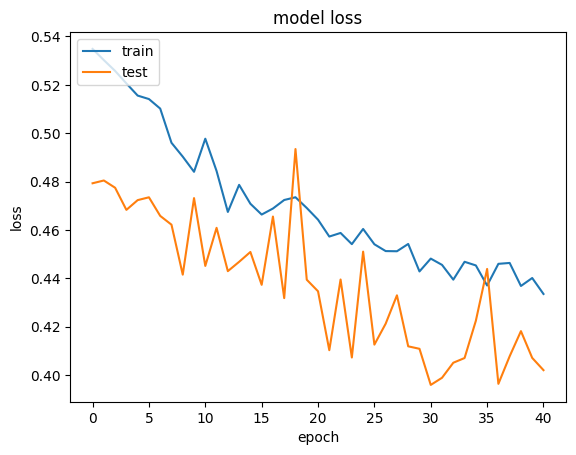

In [65]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
history = BiLSTMLayerWithWord2Vec.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [66]:
preds_bilstm_64_w2v = (BiLSTMLayerWithWord2Vec.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 10s 32ms/step


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5044
           1       0.82      0.88      0.85      4956

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

Accuracy : 0.8446


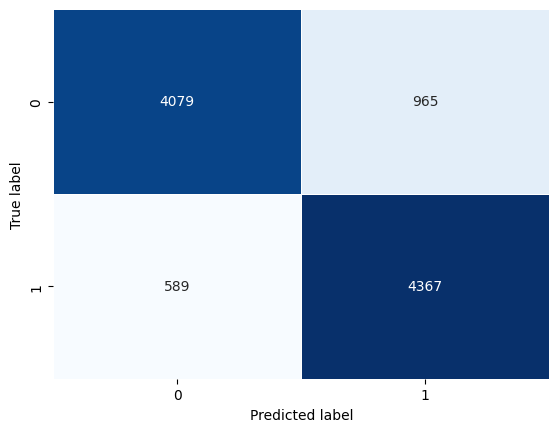

In [67]:
c_report(y_test, preds_bilstm_64_w2v)
plot_confusion_matrix(y_test, preds_bilstm_64_w2v)

Use Glove embeddings as input embedding to model in 4.d. [Compare the performance

In [68]:
embeddings_index = dict()
#f = open('glove.6B.50d.txt')
embeddings_index = {}
with open('./downloads/glove.6B/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [70]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, word_embed_dim))
for word, index in t.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [73]:
#max_length = 64

# define the model
BiLSTMLayerWithGloVe = Sequential(name="BiLSTMLayerWithGloVe")
BiLSTMLayerWithGloVe.add(Embedding(vocab_size, word_embed_dim, input_length=max_length,
                                      weights=[embedding_matrix],trainable = False))
#BiLSTMLayerWithWord2Vec.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))
BiLSTMLayerWithGloVe.add(Bidirectional(LSTM(64, dropout=0.2, return_sequences=False)))
BiLSTMLayerWithGloVe.add(Dense(32, activation='relu'))
BiLSTMLayerWithGloVe.add(Dropout(0.1))
BiLSTMLayerWithGloVe.add(Dense(1, activation='relu'))


opt = keras.optimizers.Adam(learning_rate=1e-5)

# compile the model
BiLSTMLayerWithGloVe.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(BiLSTMLayerWithGloVe.summary())

Model: "BiLSTMLayerWithGloVe"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 128, 100)          13906300  
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,994,941
Trainable params: 88,641
Non-trainable params: 13,906,300
_____________________________

Epoch 1/100
1125/1125 [==============================] - 85s 73ms/step - loss: 3.1931 - accuracy: 0.4992 - val_loss: 1.0979 - val_accuracy: 0.5030
Epoch 2/100
1125/1125 [==============================] - 71s 63ms/step - loss: 1.1983 - accuracy: 0.4999 - val_loss: 0.8284 - val_accuracy: 0.5038
Epoch 3/100
1125/1125 [==============================] - 70s 62ms/step - loss: 0.9351 - accuracy: 0.5026 - val_loss: 0.7751 - val_accuracy: 0.5092
Epoch 4/100
1125/1125 [==============================] - 72s 64ms/step - loss: 0.8627 - accuracy: 0.5007 - val_loss: 0.7561 - val_accuracy: 0.5055
Epoch 5/100
1125/1125 [==============================] - 71s 63ms/step - loss: 0.8066 - accuracy: 0.5016 - val_loss: 0.7362 - val_accuracy: 0.5025
Epoch 6/100
1125/1125 [==============================] - 70s 62ms/step - loss: 0.7822 - accuracy: 0.5039 - val_loss: 0.7283 - val_accuracy: 0.5077
Epoch 7/100
1125/1125 [==============================] - 70s 62ms/step - loss: 0.7706 - accuracy: 0.5048 - val_loss: 0

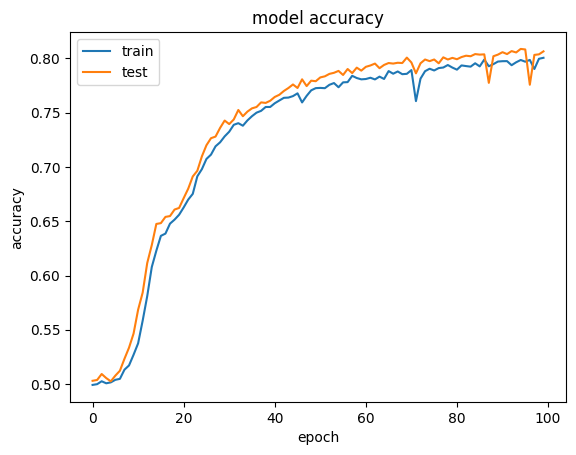

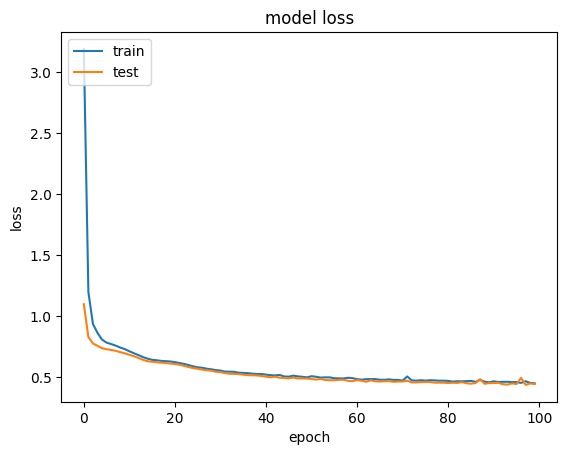

In [74]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# fit the model
history = BiLSTMLayerWithGloVe.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )
plot_training_graph(history)

In [75]:
preds_bilstm_64_glove = (BiLSTMLayerWithGloVe.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 23s 66ms/step


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      5044
           1       0.80      0.84      0.82      4956

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Accuracy : 0.8154


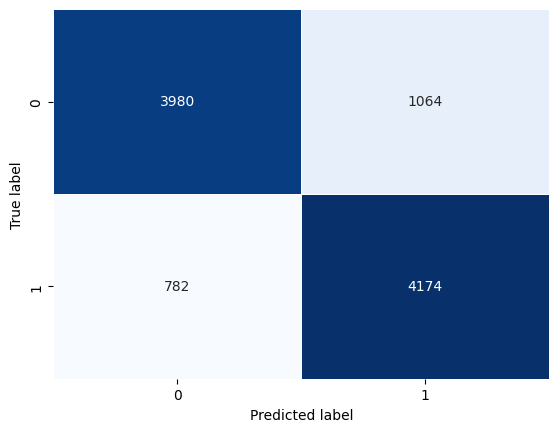

In [76]:
c_report(y_test, preds_bilstm_64_glove)
plot_confusion_matrix(y_test, preds_bilstm_64_glove)

In [77]:

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
# Others
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [78]:
word_list = []
for word, i in t.word_index.items():
    word_list.append(word)

In [79]:
def plot_words(data, start, stop, step):
    trace = go.Scatter(
        x = data[start:stop:step,0], 
        y = data[start:stop:step, 1],
        mode = 'markers',
        text= word_list[start:stop:step]
    )
    layout = dict(title= 'glove.50 vs IMDB',
                  yaxis = dict(title='glove.50'),
                  xaxis = dict(title='IMDB'),
                  hovermode= 'closest')
    fig = dict(data = [trace], layout= layout)
    py.iplot(fig)

In [80]:
glove_emds = BiLSTMLayerWithGloVe.layers[0].get_weights()[0]

In [81]:
glove_tsne_embds = TSNE(n_components=2).fit_transform(glove_emds)

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\debon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [82]:
number_of_words = 2000
plot_words(glove_tsne_embds, 0, number_of_words, 1)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed